### HW4
### 컴퓨터공학부 201958008 김시연

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1) 파일읽기 및 day, month 칼럼삭제 이후 수치형, 범주형 특성의 각 이름 리스트 출력

In [2]:
data=pd.read_csv("HW4.csv",sep=';') #파일 읽기 , 구분자는 sep로 지정

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data=data.drop(['day','month'],axis=1) #불필요한 컬럼 삭제

In [5]:
data.head() #삭제 확인

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [6]:
data.shape

(4521, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [8]:
data.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

+ 특성의 개수는 총 15개 이다. 결측치는 없으며 관측기는 4521개 이다.
+ 수치형 특성 : age, balance, duration, campaign, pdays, previous
+ 범주형 특성 : job, marital, education, default, housing, loan, contact, poutcome

In [9]:
# 리스트로 만들기
feat=[name for name in data.columns if name !='y']
feat

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [10]:
#범주형 먼저 리스트로 만들기
cat_feat= [name for name in feat if data[name].dtype=='object']
cat_feat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [11]:
#수치형 특성 리스트 만들기
num_feat=[name for name in feat if name not in cat_feat]
num_feat

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

#### 2) 범주별 비율 구하기

In [12]:
counts=data[cat_feat[0]].value_counts()
print(cat_feat[0])
print(counts/sum(counts.values))

job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64


In [13]:
for i in range(len(cat_feat)):
    counts=data[cat_feat[i]].value_counts()
    print(cat_feat[i])
    print(counts/sum(counts.values))

job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64
marital
married     0.618668
single      0.264543
divorced    0.116788
Name: marital, dtype: float64
education
secondary    0.510064
tertiary     0.298607
primary      0.149967
unknown      0.041363
Name: education, dtype: float64
default
no     0.98319
yes    0.01681
Name: default, dtype: float64
housing
yes    0.566025
no     0.433975
Name: housing, dtype: float64
loan
no     0.847158
yes    0.152842
Name: loan, dtype: float64
contact
cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: contact, dtype: float64
poutcome
unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: poutcome, dtype: float64


#### 3) 수치형 특성의 요약통계와 범주형 특성의 막대그래프 

In [14]:
data[num_feat].describe() #수치형 특성의 요약통계

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


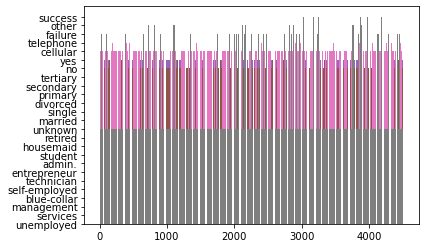

In [15]:
#범주형 특성의 막대그래프
for i in cat_feat:
    dat=data[i]
    plt.bar(dat.index,dat.values)

#### 4) 특성행렬 만들고 범주형 특성은 원핫인토딩한 데이터프레임 만들기 이후 레이블에 yes=>0, no=>1 인코딩

In [16]:
X=data.drop(['y'],axis=1)

In [17]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other


In [18]:
X=pd.get_dummies(X) #원핫인코딩

In [19]:
X=X.to_numpy()

In [20]:
X

array([[  30, 1787,   79, ...,    0,    0,    1],
       [  33, 4789,  220, ...,    0,    0,    0],
       [  35, 1350,  185, ...,    0,    0,    0],
       ...,
       [  57,  295,  151, ...,    0,    0,    1],
       [  28, 1137,  129, ...,    1,    0,    0],
       [  44, 1136,  345, ...,    1,    0,    0]], dtype=int64)

In [21]:
y=data['y'].to_numpy()

In [22]:
set(y)

{'no', 'yes'}

In [23]:
y=np.where(y=='no',1,0)

In [24]:
y

array([1, 1, 1, ..., 1, 1, 1])

#### 5) 데이터를 훈련용:테스트용 8:2 분할 및 표준화

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1,stratify=y)

In [27]:
X_train.shape

(3616, 38)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
sc.fit(X_train)


StandardScaler()

In [30]:
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#### 6) CV=5,  로지스틱 회귀, C=[0.01,0.1,1,10,100] 최적값 구하기, 테스트스코어 구하기, 정오분류표 작성, 정밀도, 재현율 의미

In [32]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [31]:
from sklearn.model_selection import cross_val_score

In [39]:
scores=cross_val_score(logistic,X=X_train_std,y=y_train,cv=5)

In [40]:
scores

array([0.89917127, 0.91562932, 0.91147994, 0.89488243, 0.88934993])

##### 7) 그리드서치 cv=5 이용 결정트리의 최적 최대 깊이 구하고 테스트 스코어 구하기

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [45]:
param_grid={'max_depth':range(1,10)}
gscv=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_grid=param_grid,
    scoring='accuracy',cv=5,n_jobs=-1
)

In [46]:
gscv.fit(X_train_std,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 10)}, scoring='accuracy')

In [47]:
print(gscv.best_score_)

0.9007194546968968


In [48]:
print(gscv.best_params_)

{'max_depth': 2}


##### 8) StandardScaler, PCA, SVC 파이프라인 생성, 그리드서치를 사용하여 최적의 C와 감마 구하기

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
pipe_line=make_pipeline(
    StandardScaler(),PCA(n_components=5),SVC(kernel='rbf',random_state=1)
)

In [54]:
p_list = [0.01,0.1,1.0,10.0,100.0]
param_grid = {'svc__C':p_list, 'svc__gamma':p_list}

In [55]:
gs=GridSearchCV(
    estimator=pipe_line,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1
)

In [56]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'svc__gamma': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='accuracy')

In [57]:
print(gs.best_params_)
print(gs.score(X_test, y_test))

{'svc__C': 1.0, 'svc__gamma': 1.0}
0.876243093922652
